# Assumptions of Linear Regression

Linear regression is a statistical model that allows to explain a dependent variable y based on variation in one or multiple independent variables (denoted x). It does this based on linear relationships between the independent and dependent variables.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Linear Regression Basic Model

Let’s start by describing a common use case for linear regression. We will be looking at a model in which we explain and predict house prices for future house sales based on a number of physical criteria of the houses. Now, we are interested in explaining the relationship between the house price and each of the other variables. To model this, we will do a linear regression that models the following formula: 

$P = \beta_0 + \beta_1 X_{SqFt} + \beta_2 X_{BdR} + \beta_3 X_{BthR} + \epsilon$

- Beta 0, the intercept coefficient, gives the value for the SellPrice for the hypothetical case in which all explanatory variables are 0.
- Beta’s 1 to 3, the slope coefficients, give the increase in SellPrice for a 1-step increase in the specific variable.
- Epsilon: the variation in SellPrice that is not explained by the model (this may be random variation or variation that is due to some explanatory variables)

In [2]:
# load data
url = "https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv"
df = pd.read_csv(url, index_col="Home").drop(columns=["Brick", "Neighborhood", "Offers"])
df

,Price,SqFt,Bedrooms,Bathrooms
Home,,,,
1,114300,1790,2,2
2,114200,2030,4,2
3,114800,1740,3,2
4,94700,1980,3,2
5,119800,2130,3,3
...,...,...,...,...
124,119700,1900,3,3
125,147900,2160,4,3
126,113500,2070,2,2


In [3]:
# fit linear regression model
y = df["Price"]
X = df[["SqFt", "Bedrooms", "Bathrooms"]]

X = sm.add_constant(X) # y-intercept
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     32.42
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.53e-15
Time:                        12:36:22   Log-Likelihood:                -1449.5
No. Observations:                 128   AIC:                             2907.
Df Residuals:                     124   BIC:                             2918.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5640.8333   1.72e+04     -0.328      0.7

## Linear Regression Assumptions

Since the focus of this article is to cover assumption checking, let’s skip model interpretation and move directly to the assumptions that you need to check to make sure that your model is well built.

### Assumption 1: Independence of observations

Independence means that there is no relation between the different examples. This is not something that can be deduced by looking at the data: the data collection process is more likely to give an answer to this. 

- A clear case of dependent observations (which we don’t want!) can occur when you are using time series. Imagine a daily data measurement of a certain value. In this case, the value of today is closer to the value of yesterday than the value of a long time ago.
- A clear case of independent observations (which we do want!) are experimental studies in which participants are randomly assigned to treatment groups. In this case, it is the fact that assignment is random and forced that makes sure that there are no hidden relationships between observations.

### Assumption 2: No hidden or missing values

The second assumption of the linear regression model is that you have used all relevant explanatory variables in your model. If you do not do this, you end up with a wrong model, as the model will try to assign coefficients to the variables that do exist in your data set. This is often referred to as misspecification of a model. If adding a variable to the model would make a whole lot of difference, it means that the model is incorrect and useless without it. The only thing you can do in this case is to get back to your data collection to find the necessary data.

### Assumption 3: Linear relationship

The third assumption of Linear Regression is that relations between the independent and dependent variables must be linear. Although this assumption is not always cited in the literature, it is logical and important to check for it. After all, if your relationships are not linear, you should not use a linear model, but rather a non-linear model of which plenty exist. You can check for linear relationships easily by making a scatter plot for each independent variable with the dependent variable. Although there are many other ways to do scatterplots, this approach is simple and good enough for checking assumptions.

To find out whether the 1-on-1 relationships are linear, you need to judge whether the data points are more or less on or around a straight line. Clear antipatterns are when you see curves, parabolas, exponentials, or basically any shape that is recognizable as not a straight line. The plots do not show perfect straight lines, but this is not a problem. There also isn’t any clear non-linear pattern and a linear model may work well on this.

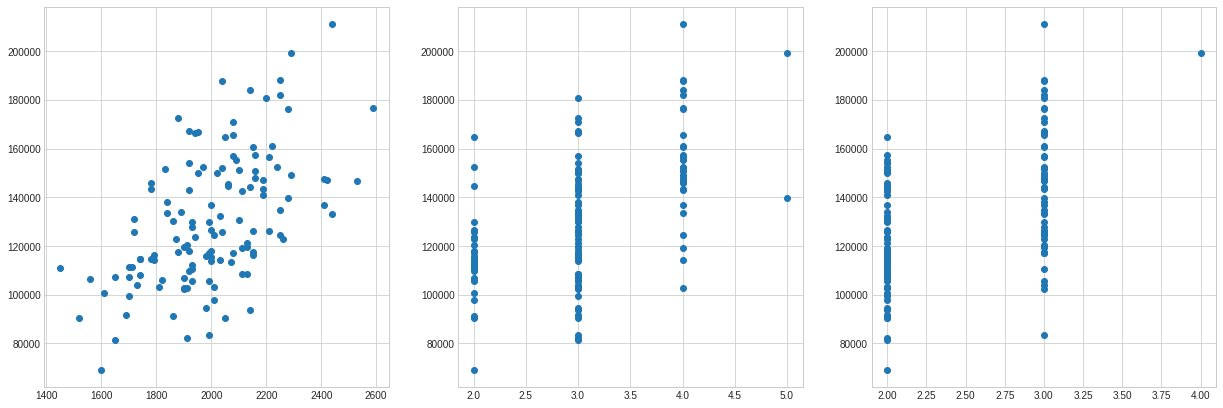

In [4]:
# scatter plot to check linearity
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
axes[0].scatter(X['SqFt'], y)
axes[1].scatter(X['Bedrooms'], y)
axes[2].scatter(X['Bathrooms'], y)
plt.show()

### Assumption 4: Normality of residuals

The fourth assumption of Linear Regression is that the residuals should follow a normal distribution. Once you obtain the residuals from your model, this is relatively easy to test using either a histogram or a QQ Plot. QQ Plots are a bit harder to read but they are more precise to interpret. What you need to look at in QQ Plots is whether the points are on the straight line going from bottom left to top right. When deviations occur, they are often located at the lower or higher end of the line, whereas deviations in the middle are less likely.

If you see any type of an S form, an exponential curve, or another shape than a straight line, this means you have a problem: your model is probably not correctly specified. Probably you are missing some variables, or maybe your relationships are not actually linear! You may want to try out nonlinear models or other specifications of the linear model (using different variables or different preparation of the variables). In the current example there is clearly an inverted S form meaning that something is probably wrong with the model.

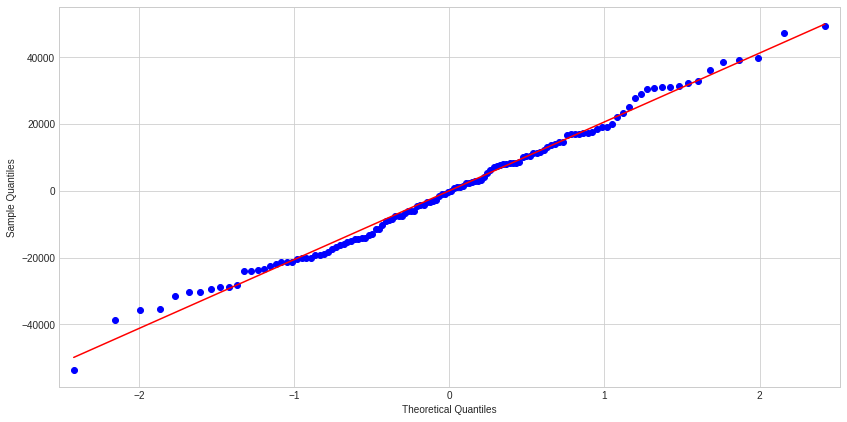

In [5]:
## QQ-Plot of model residuals
fig, axis = plt.subplots(1,1, figsize=(14,7))
residuals = result.resid
sm.qqplot(residuals, line="r", ax=axis)
plt.show()

### Assumption 5: No or little multicollinearity

Multicollinearity is the phenomenon when a number of the explanatory variables are strongly correlated. So why do we want to have strong correlations between each independent variable and the dependent variable, but no correlation between independent variables? The reason is that if two independent variables are correlated, they explain the same information. The model will not be able to know which of the two variables is actually responsible for a change in the dependent variable.

You can test for multicollinearity problems using the Variance Inflation Factor, or VIF in short. The VIF indicates for an independent variable how much it is correlated to the other independent variables. VIF starts from 1 and has no upper limit. A VIF of 1 is the best you can have as this indicates that there is no multicollinearity for this variable. A VIF of higher than 5 or 10 indicates that there is a problem with the independent variables in your model.

In [6]:
# check variance inflation factor for multicollinearity
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'Bathrooms': 1.443789242996769,
 'Bedrooms': 1.3699093115827758,
 'SqFt': 1.5610609510358064}

### Assumption 6: Homoscedasticity

Homoscedasticity in a model means that the error is constant along the values of the dependent variable. The best way for checking homoscedasticity is to make a scatterplot with the residuals against the dependent variable. Homoscedasticity means a constant error, you are looking for a constant deviation of the points from the zero-line. 

In the current case, this clearly does not look like a constant variance around the zero-line. If you violate homoscedasticity, this means you have heteroscedasticity. You may want to do some work on your input data: maybe you have some variables to add or remove. Another solution is to do transformations, like applying a logistic or square root transformation to the dependent variable. If this doesn’t change anything, you can also switch to the weighted least squares model. Weighted least squares is a model that can deal with unconstant variances and heteroscedasticity is therefore not a problem.

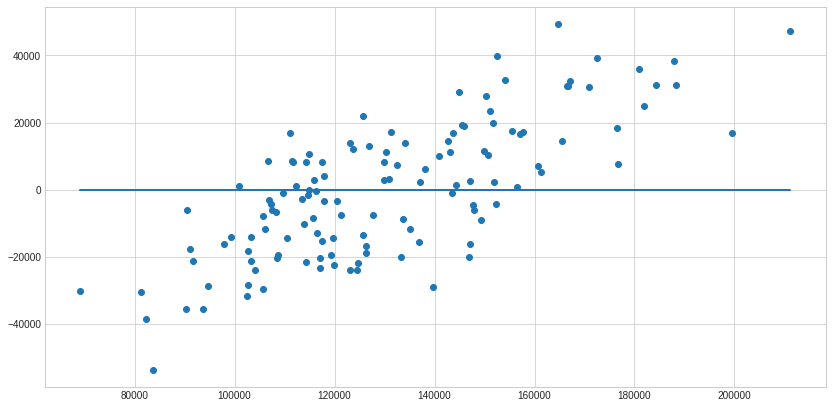

In [7]:
# plot residuals of model against target variable
plt.figure(figsize=(14,7))
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))
plt.show()

### Assumption 7: No Endogeneity

The seventh diagnostical check of your linear regression model serves to check whether there is correlation between any of the independent variables and the error term. If this happens, it is likely that you have a case of a misspecified model. You may have forgotten an important explanatory variable. In those scatter plots, we do not see any clear correlation.

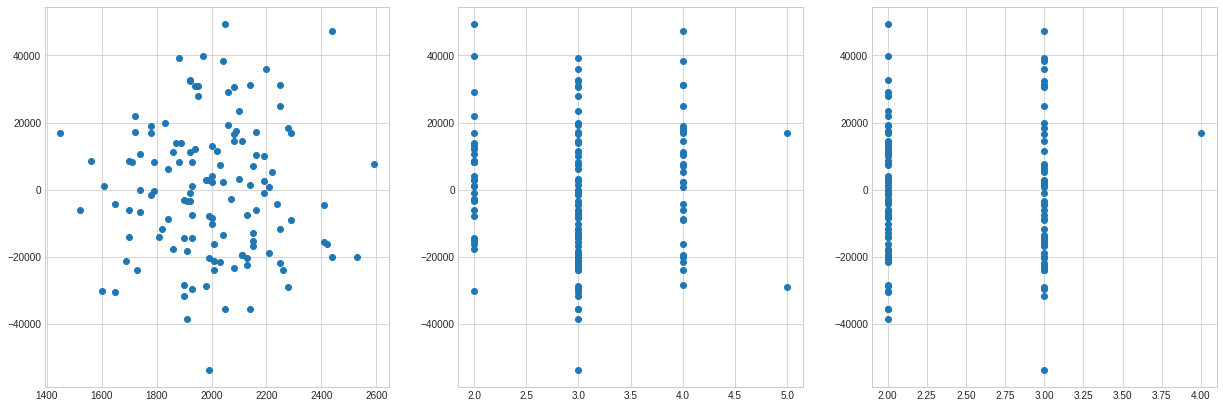

In [8]:
# scatter plot to check endogeneity
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
axes[0].scatter(X['SqFt'], residuals)
axes[1].scatter(X['Bedrooms'], residuals)
axes[2].scatter(X['Bathrooms'], residuals)
plt.show()

### Assumption 8: Uncorrelated observations of error term

The last model diagnostic that we’re going to look at is whether there is a correlation inside the observations of the error term. If this happens, you definitely violate assumption 1: the observations are not drawn randomly. You can do a visual check by plotting the residuals against the order of the residuals. If a pattern occurs, it is likely that you have a case of a misspecified model. You may have forgotten an important explanatory variable. Or you might be better of using another family of models. If you have autocorrelation you may want to look into time series models like Auto-Regression Moving Average or ARMA.

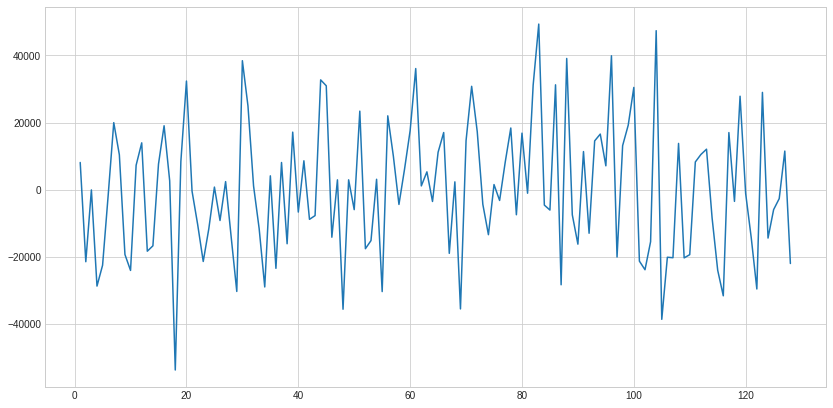

In [9]:
# plot residuals against their index as line plot
plt.figure(figsize=(14,7))
plt.plot(residuals.index, residuals)
plt.show()

## Actions against violations of assumptions

there are things you can do for mostly all cases of invalidated assumptions. Here is an overview of which alternative methods to go to in case of invalidated assumptions:
- Working on your input data by doing transformations, or by adding missing variables can solve many problems
- Nonlinear regression is a great way to go when you find out that you have a misspecification
- If you observe multicollinearity, you probably want to use less variables in your model. You have strongly related explanatory variables and it would be best to choose amongst them. An alternative can be to make a composite variable out of them using for example Principal Component Analysis.
- If you observe hetroscedasticity you can move to the weighted least squares model which is an alternative to the OLS that can deal with this
- If your independent variables are correlated with the error, you are very likely in a case of a misspecified model and you should work on the choice of the right variables to include in your study
- If error terms are related to each other, you may be in a case where autocorrelation is present and you may be well of using time series models.